In [651]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [652]:
!pip install wget
import wget 
wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

'end_seminar (7).xlsx'

In [653]:
data = pd.read_excel('end_seminar.xlsx')

# **Часть 1.**

# 1)

Последние 10 элементов

In [654]:
data.tail(10)


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
351,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,Символьные вычисления,Да,0.942029,174.0,DevOps,NaN
352,2020-05-18 23:59:20.831,f93afd8e92c336b471aa3bbbc579aefe,1298,NaN,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,NaN
353,2020-05-18 23:59:28.998,9963fc00d9405a35b894cc04a7e19855,1135,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Символьные вычисления,Да,0.572464,175.0,DevOps,NaN
354,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,NaN,NaN,Байесовские методы машинного обучения,Глубинное обучение в обработке звука,Statistical Learning Theory,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,NaN
355,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения,Анализ неструктурированных данных,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,NaN
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


# 2)


Посчитаем студентов по курсам 

In [655]:
data.count()

timestamp        361
id               361
rating           361
18_group         223
is_mi             18
fall_1           361
fall_2           361
fall_3           361
spring_1         361
spring_2         361
spring_3         361
is_first_time    359
percentile       361
17_group         138
blended          138
is_ml_student     57
dtype: int64

17_ группы - 138

18_ группы - 223 

In [656]:
print('Количество дублирующихся перцентилей:', data['percentile'].duplicated().sum())

Количество дублирующихся перцентилей: 15


# 3)


In [657]:
data.isnull().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

In [658]:
text_or_numeric = {'18_group' : '0', 'is_mi': '0','is_first_time': '', '17_group' : '0', 'blended' : '','is_ml_student': '' }
data = data.fillna(value = text_or_numeric)

# 4)


In [659]:
data['is_first_time'].value_counts()


Да     308
Нет     51
         2
Name: is_first_time, dtype: int64

In [660]:
data = data.drop_duplicates(subset=['rating', 'percentile'],keep = 'last')

# 5)

In [661]:
print('Возможные blended курсы:')
', '.join(list(filter(None, data['blended'].unique())))

Возможные blended курсы:


'DevOps, Введение в дифференциальную геометрию, Соревновательный анализ данных'

In [662]:
data['blended'].value_counts()

                                         213
DevOps                                    87
Соревновательный анализ данных            32
Введение в дифференциальную геометрию     15
Name: blended, dtype: int64

Наибольшее количество студентов записались на курс 'DevOps'

In [663]:
group_bl = data.groupby('blended', axis = 0).mean()
pd.DataFrame(group_bl['rating'])

,rating
blended,
,633.901408
DevOps,1154.172414
Введение в дифференциальную геометрию,1210.733333
Соревновательный анализ данных,1144.218750


Наибольший средний рейтинг у студентов, записавшихся на "Введение в дифференциальную геометрию"

# 6)


In [664]:
diff = data.loc[data.duplicated(['fall_1', 'fall_2', 'fall_3', 'spring_1','spring_2', 'spring_3', 'blended'], keep = False)]

In [665]:
diff.head(5)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
16,2020-05-15 16:58:06.959,64173586abab6f7a172946c8c74bde0d,630,181,0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,Да,0.502242,0,,
30,2020-05-16 15:01:06.274,b121e4d7d62387cd5199cca464a34a6d,694,185,0,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,Нет,0.204036,0,,
40,2020-05-17 00:54:43.939,d38ebd0ba564ea88de8015e116f811c8,546,187,0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,Да,0.883408,0,,
64,2020-05-18 11:13:13.920,b8d4c538f6b47a1a692bec6c2f29152b,682,183,0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,Да,0.260090,0,,
67,2020-05-18 12:41:04.520,348562c4a55053de25fdd4389b9f1181,650,186,0,Моделирование временных рядов,Сбор и обработка данных с помощью краудсорсинга,Безопасность компьютерных систем,Компьютерные сети,Дополнительные главы прикладной статистики,Системы баз данных,Да,0.412556,0,,1


In [666]:
diff['id'].count()

32

In [667]:
diff_subj = diff[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']]

diff_subj.groupby(diff_subj.columns.tolist()).size().reset_index().rename(columns={0:'Количество повторений'})


,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,Количество повторений
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
1,Байесовские методы машинного обучения,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,DevOps,2
2,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,DevOps,2
3,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,,3
4,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,DevOps,2
5,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,3
6,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,2
7,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,2
8,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,,2
9,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,,2



# 7)




In [668]:
data = data.astype({'17_group': 'int', '18_group' : 'int'})

In [669]:
data.dtypes

timestamp        datetime64[ns]
id                       object
rating                    int64
18_group                  int64
is_mi                    object
fall_1                   object
fall_2                   object
fall_3                   object
spring_1                 object
spring_2                 object
spring_3                 object
is_first_time            object
percentile              float64
17_group                  int64
blended                  object
is_ml_student            object
dtype: object

In [670]:
groups_18 =  data.drop(data[data['17_group'] == 0].index)
groups_17 =  data.drop(data[data['18_group'] == 0].index)

In [671]:
unique_18_сheck = groups_18[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']].nunique()
unique_18_сheck


fall_1      9
fall_2      9
fall_3      9
spring_1    8
spring_2    8
spring_3    8
blended     3
dtype: int64

In [672]:
unique_17_сheck = groups_17[['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']].nunique()
unique_17_сheck

fall_1      9
fall_2      9
fall_3      9
spring_1    8
spring_2    8
spring_3    8
blended     1
dtype: int64

Видим, что для каждого пулла (1,2,3)каждый курс выбирался хотя бы 1 студентом 

In [673]:
unique_18_fall = groups_18['fall_1'].unique()
unique_18_spring = groups_18['spring_1'].unique()
unique_17_fall = groups_17['fall_1'].unique()
unique_17_spring = groups_17['spring_1'].unique()
unique_fall = (pd.DataFrame(list(unique_18_fall) + list(unique_17_fall))).drop_duplicates(keep = False)
unique_spring = (pd.DataFrame(list(unique_18_spring) + list(unique_17_spring))).drop_duplicates(keep = False)

,0


Предметы, которые предлагались только для одного из курсов Fall


In [674]:
unique_fall

,0
1,Глубинное обучение в обработке звука
4,Анализ неструктурированных данных
5,Байесовские методы машинного обучения
9,Язык SQL
13,Теория баз данных
16,Матричные вычисления


Предметы, которые предлагались только для одного из курсов Fall

In [675]:
unique_spring

,0
0,Компьютерное зрение
1,Проектирование и разработка высоконагруженных ...
2,Конфликты и кооперация
3,Символьные вычисления
4,Методы сжатия и передачи медиаданных
5,Обучение с подкреплением
6,Генеративные модели в машинном обучении
8,Дискретная оптимизация
9,Компьютерные сети
10,Промышленное программирование на языке Java


Методом исключения получаем остальные 

In [676]:
from collections import Counter
counter_fall = Counter(list(unique_18_fall) + list(unique_17_fall))
counter_fall

Counter({'Statistical Learning Theory': 2,
         'Анализ неструктурированных данных': 1,
         'Байесовские методы машинного обучения': 1,
         'Безопасность компьютерных систем': 2,
         'Высокопроизводительные вычисления': 2,
         'Глубинное обучение в обработке звука': 1,
         'Матричные вычисления': 1,
         'Моделирование временных рядов': 2,
         'Принятие решений в условиях риска и неопределённости': 2,
         'Сбор и обработка данных с помощью краудсорсинга': 2,
         'Теория баз данных': 1,
         'Язык SQL': 1})

In [677]:
counter_spring = Counter(list(unique_18_spring) + list(unique_17_spring))
counter_spring

Counter({'Анализ данных в бизнесе': 1,
         'Генеративные модели в машинном обучении': 1,
         'Дискретная оптимизация': 1,
         'Дополнительные главы прикладной статистики': 1,
         'Компьютерное зрение': 1,
         'Компьютерные сети': 1,
         'Конфликты и кооперация': 1,
         'Машинное обучение 2': 1,
         'Методы сжатия и передачи медиаданных': 1,
         'Обучение с подкреплением': 1,
         'Проектирование и разработка высоконагруженных сервисов': 1,
         'Промышленное программирование на языке Java': 1,
         'Символьные вычисления': 1,
         'Системы баз данных': 1,
         'Численные методы': 2})

#Визуализация

In [678]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 

Переведём дату в формат гггг-мм-дд

In [679]:
data['timestamp'] = pd.to_datetime(data['timestamp'])  
data['timestamp'] = data['timestamp'].dt.date

In [680]:
pypl = data.groupby('timestamp').mean()
pypl['timestamp'] = pypl.index
pypl

,rating,18_group,percentile,17_group,timestamp
timestamp,,,,,
2020-05-14,1160.277778,0.000000,0.507649,173.888889,2020-05-14
2020-05-15,719.866667,158.500000,0.430484,23.266667,2020-05-15
2020-05-16,736.400000,147.866667,0.506213,34.733333,2020-05-16
2020-05-17,915.027027,84.513514,0.501912,92.891892,2020-05-17
2020-05-18,827.352679,117.133929,0.487083,63.549107,2020-05-18
2020-05-19,761.142857,131.071429,0.577765,49.285714,2020-05-19
2020-05-20,689.500000,139.250000,0.777393,43.250000,2020-05-20
2020-05-21,584.000000,188.000000,0.721973,0.000000,2020-05-21
2020-05-23,1080.500000,0.000000,0.677536,174.000000,2020-05-23


In [681]:
x = pypl['timestamp']
y = pypl['rating']


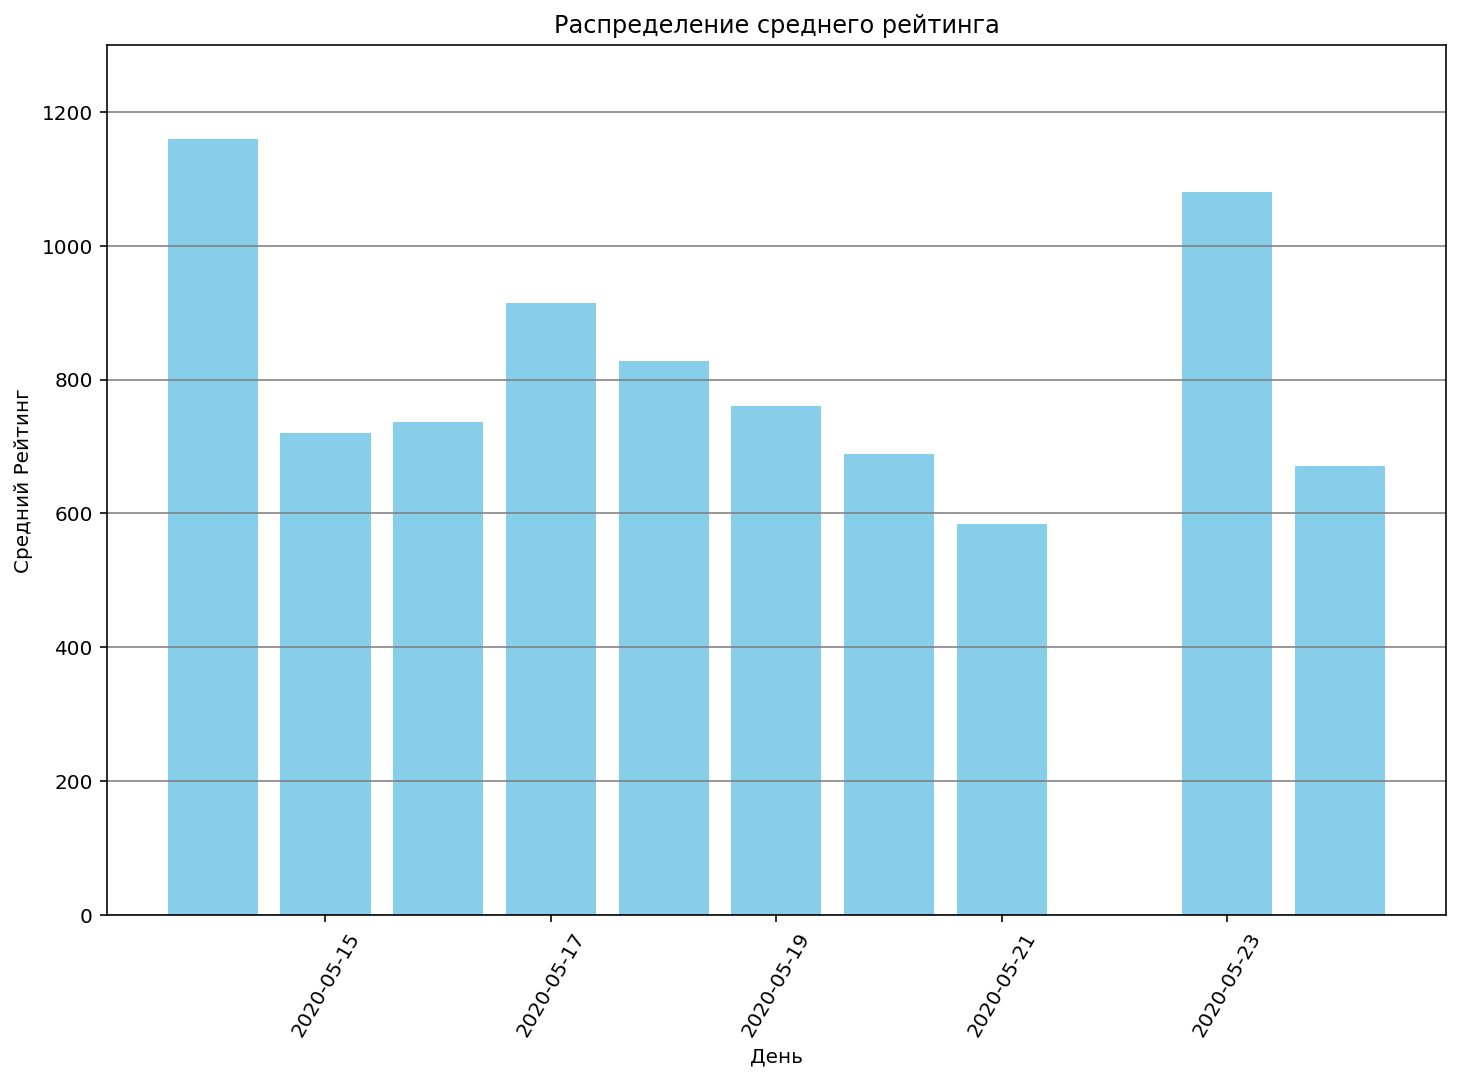

In [682]:
fig, ax = plt.subplots()

ax.bar(x, y, color = 'skyblue')
%config InlineBackend.figure_format = 'retina'
ax.grid(axis = 'y', color = 'grey')
fig.set_figwidth(12)    
fig.set_figheight(8)    
ax.set_ylabel('Средний Рейтинг')
ax.set_xlabel('День')
ax.set_title('Распределение среднего рейтинга')
plt.rcParams['font.size'] = 15
plt.ylim([0,1300])
plt.xticks(rotation = 60)
plt.show()
fig.savefig('Mean_rating.pdf')

# **2. Распределение студентов по курсам.**

# 0)

In [683]:
assert data.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert data.isna().sum().sum() == 0, 'В таблице остались пропуски'

# 1)

In [684]:
data["17_group"] = pd.to_numeric(data["17_group"])
data["18_group"] = pd.to_numeric(data["18_group"])
data['group'] = data['17_group'] + data['18_group']
data.group.unique()

array([181, 185, 182, 183, 187, 186, 184, 188, 172, 176, 171, 175, 173,
       174, 177])

In [685]:
data

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,group
0,2020-05-15,93ff79a51cd602f1dd3028ba2c129503,698,181,0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0,,,181
1,2020-05-15,26b01b1c4cd5656bab18d24c548834fb,647,181,0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0,,,181
2,2020-05-15,30f3653fc176d54e89ac3179c455c6dd,624,185,0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0,,,185
3,2020-05-15,1528f0eaa027580820ccf0d92a53ad68,579,182,0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0,,,182
4,2020-05-15,496ea4f0d4abe264b1bb1b80eb3830c5,572,183,0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0,,,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0,0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174,DevOps,,174
357,2020-05-19,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0,0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174,DevOps,,174
358,2020-05-20,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0,0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173,Соревновательный анализ данных,,173
359,2020-05-23,79d14db48e4737af731960ae212d5134,966,0,0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172,DevOps,,172


Исходя из условий задачи, создадим столбец с количеством курсов студентов - 'course quantity'

In [686]:
groups_dictionary ={ 171 : 2,
                     172 : 2,
                     173 : 2,
                     174 : 1,
                     175 : 1,
                     176 : 1,
                     177 : 1,
                     181 : 1,
                     182 : 1,
                     183 : 1,
                     184 : 1,
                     185 : 1,
                     186 : 1,
                     187 : 1,
                     188 : 1
                     }
data['course_quantity'] = data['group'].map(groups_dictionary)
data["is_mi"] = data['is_mi'].astype(int)
data.loc[(data.is_mi == 1 ), 'course_quantity'] = 2
data

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,group,course_quantity
0,2020-05-15,93ff79a51cd602f1dd3028ba2c129503,698,181,0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0,,,181,1
1,2020-05-15,26b01b1c4cd5656bab18d24c548834fb,647,181,0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0,,,181,1
2,2020-05-15,30f3653fc176d54e89ac3179c455c6dd,624,185,0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0,,,185,1
3,2020-05-15,1528f0eaa027580820ccf0d92a53ad68,579,182,0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0,,,182,1
4,2020-05-15,496ea4f0d4abe264b1bb1b80eb3830c5,572,183,0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0,,,183,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2020-05-19,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0,0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174,DevOps,,174,1
357,2020-05-19,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0,0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174,DevOps,,174,1
358,2020-05-20,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0,0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173,Соревновательный анализ данных,,173,2
359,2020-05-23,79d14db48e4737af731960ae212d5134,966,0,0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172,DevOps,,172,2


In [687]:
col_name = 'course_quantity'

assert(data[data['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(data[data['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(data[data['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(data[data['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

# 2)


Отсортируем студентов по перцентилю и получим список предметов, которые студенты выбирали в качестве первого приоритета 

In [688]:
data = data.sort_values(by = 'percentile', ascending= True)

In [689]:
data['fall_1'].unique()

array(['Безопасность компьютерных систем', 'Statistical Learning Theory',
       'Матричные вычисления', 'Высокопроизводительные вычисления',
       'Сбор и обработка данных с помощью краудсорсинга',
       'Байесовские методы машинного обучения', 'Теория баз данных',
       'Анализ неструктурированных данных',
       'Глубинное обучение в обработке звука',
       'Моделирование временных рядов', 'Язык SQL',
       'Принятие решений в условиях риска и неопределённости'],
      dtype=object)

Создаем столцы с бинарным признаком, где 1 - студент выбрал данный курс как первый приоритет, 0 - условие не выполнено

In [690]:
data['Безопасность компьютерных систем'] = np.where((data['fall_1'] == 'Безопасность компьютерных систем')|(data['fall_2'] == 'Безопасность компьютерных систем') & (data['course_quantity'] == 2) , 1, 0)
data['Statistical Learning Theory'] = np.where((data['fall_1'] == 'Statistical Learning Theory')|(data['fall_2'] == 'Statistical Learning Theory') & (data['course_quantity'] == 2), 1, 0)
data['Матричные вычисления'] = np.where((data['fall_1'] == 'Матричные вычисления')|(data['fall_2'] == 'Матричные вычисления') & (data['course_quantity'] == 2), 1, 0)
data['Высокопроизводительные вычисления'] = np.where((data['fall_1'] == 'Высокопроизводительные вычисления')|(data['fall_2'] == 'Высокопроизводительные вычисления') & (data['course_quantity'] == 2), 1, 0)
data['Сбор и обработка данных с помощью краудсорсинга'] = np.where((data['fall_1'] == 'Сбор и обработка данных с помощью краудсорсинга')|(data['fall_2'] == 'Сбор и обработка данных с помощью краудсорсинга') & (data['course_quantity'] == 2), 1, 0)
data['Байесовские методы машинного обучения'] = np.where((data['fall_1'] == 'Байесовские методы машинного обучения')|(data['fall_2'] == 'Байесовские методы машинного обучения') & (data['course_quantity'] == 2), 1, 0)
data['Теория баз данных'] = np.where((data['fall_1'] == 'Теория баз данных')|(data['fall_2'] == 'Теория баз данных') & (data['course_quantity'] == 2), 1, 0)
data['Анализ неструктурированных данных'] = np.where((data['fall_1'] == 'Анализ неструктурированных данных')|(data['fall_2'] == 'Анализ неструктурированных данных') & (data['course_quantity'] == 2), 1, 0)
data['Глубинное обучение в обработке звука'] = np.where((data['fall_1'] == 'Глубинное обучение в обработке звука')|(data['fall_2'] == 'Глубинное обучение в обработке звука') & (data['course_quantity'] == 2), 1, 0)
data['Моделирование временных рядов'] = np.where((data['fall_1'] == 'Моделирование временных рядов')|(data['fall_2'] == 'Моделирование временных рядов') & (data['course_quantity'] == 2), 1, 0)
data['Язык SQL'] = np.where((data['fall_1'] == 'Язык SQL')|(data['fall_2'] == 'Язык SQL') & (data['course_quantity'] == 2), 1, 0)
data['Принятие решений в условиях риска и неопределённости'] = np.where((data['fall_1'] == 'Принятие решений в условиях риска и неопределённости')|(data['fall_2'] == 'Принятие решений в условиях риска и неопределённости') & (data['course_quantity'] == 2), 1, 0)
data.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,group,course_quantity,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения,Теория баз данных,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Моделирование временных рядов,Язык SQL,Принятие решений в условиях риска и неопределённости
80,2020-05-18,3e106aaef8b24dbb01319c73e14c2936,784,182,0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.000000,0,,1,182,1,1,0,0,0,0,0,0,0,0,0,0,0
231,2020-05-14,3a7326c9e355a67d3805824ca34c4bc5,1457,0,0,Statistical Learning Theory,Высокопроизводительные вычисления,Statistical Learning Theory,Символьные вычисления,Численные методы,Символьные вычисления,Да,0.000000,173,Введение в дифференциальную геометрию,,173,2,0,1,0,1,0,0,0,0,0,0,0,0
91,2020-05-18,e0ca1a9548af9a3f98428c62420aa484,764,182,0,Матричные вычисления,Безопасность компьютерных систем,Statistical Learning Theory,Дискретная оптимизация,Дополнительные главы прикладной статистики,Машинное обучение 2,Да,0.004484,0,,,182,1,0,0,1,0,0,0,0,0,0,0,0,0
273,2020-05-18,7fe7df0d207babbf30249b3063ac1f26,1365,0,0,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Методы сжатия и передачи медиаданных,Да,0.007246,175,DevOps,,175,1,0,0,0,1,0,0,0,0,0,0,0,0
19,2020-05-15,86d929f6fd741e56e93cee5900298849,761,181,0,Сбор и обработка данных с помощью краудсорсинга,Сбор и обработка данных с помощью краудсорсинга,Сбор и обработка данных с помощью краудсорсинга,Дополнительные главы прикладной статистики,Дополнительные главы прикладной статистики,Дополнительные главы прикладной статистики,Да,0.008969,0,,,181,1,0,0,0,0,1,0,0,0,0,0,0,0


Получим уникальные id студентов, выбравших курс в качестве первого приоритета c учётом ограничений на количество студентов

In [691]:
comp_bez = data.loc[data['Безопасность компьютерных систем'] == 1].iloc[:30]['id']
vys_vych = data.loc[data['Высокопроизводительные вычисления'] == 1].iloc[:60]['id']
stat_learn = data.loc[data['Statistical Learning Theory'] == 1].iloc[:60]['id']
an_nestr = data.loc[data['Анализ неструктурированных данных'] == 1]['id']
Sbor_obr = data.loc[data['Сбор и обработка данных с помощью краудсорсинга'] == 1].iloc[:30]['id']
Matr_vych = data.loc[data['Матричные вычисления'] == 1].iloc[:30]['id']
Bayes = data.loc[data['Байесовские методы машинного обучения'] == 1].iloc[:30]['id']
Glub_obuch = data.loc[data['Глубинное обучение в обработке звука'] == 1].iloc[:30]['id']
Ter_baz = data.loc[data['Теория баз данных'] == 1].iloc[:30]['id']
Mod_rd = data.loc[data['Моделирование временных рядов'] == 1].iloc[:30]['id']
Prin_resh = data.loc[data['Принятие решений в условиях риска и неопределённости'] == 1].iloc[:30]['id']
SQL = data.loc[data['Язык SQL'] == 1].iloc[:30]['id']


Определим для всех (и тех, у кого 1, и тех, у кого 2 курса по выбору) первый курс 

In [692]:
first_wave = pd.DataFrame(data['id'])
first_wave['1_course'] = 0
first_wave['2_course'] = 0
first_wave['amount'] = data['course_quantity']
first_wave.loc[(first_wave.index.isin(comp_bez.index)), '1_course'] = 'Безопасность компьютерных систем'
first_wave.loc[(first_wave.index.isin(vys_vych.index)), '1_course'] = 'Высокопроизводительные вычисления'
first_wave.loc[(first_wave.index.isin(stat_learn.index)), '1_course'] = 'Statistical Learning Theory'
first_wave.loc[(first_wave.index.isin(an_nestr.index)), '1_course'] = 'Анализ неструктурированных данных'
first_wave.loc[(first_wave.index.isin(Sbor_obr.index)), '1_course'] = 'Сбор и обработка данных с помощью краудсорсинга'
first_wave.loc[(first_wave.index.isin(Matr_vych.index)), '1_course'] = 'Матричные вычисления'
first_wave.loc[(first_wave.index.isin(Bayes.index)), '1_course'] = 'Байесовские методы машинного обучения'
first_wave.loc[(first_wave.index.isin(Glub_obuch.index)), '1_course'] = 'Глубинное обучение в обработке звука'
first_wave.loc[(first_wave.index.isin(Ter_baz.index)), '1_course'] = 'Теория баз данных'
first_wave.loc[(first_wave.index.isin(Mod_rd.index)), '1_course'] = 'Моделирование временных рядов'
first_wave.loc[(first_wave.index.isin(Prin_resh.index)), '1_course'] = 'Принятие решений в условиях риска и неопределённости'
first_wave.loc[(first_wave.index.isin(SQL.index)), '1_course'] = 'Язык SQL'


Теперь определим второй курс для тех, кто должен был выбрать 2 курса осенью

In [693]:
first_wave.loc[first_wave['1_course'].ne('Безопасность компьютерных систем') & first_wave['amount'].eq(2) & first_wave.index.isin(comp_bez.index) , '2_course'] = 'Безопасность компьютерных систем'
first_wave.loc[first_wave['1_course'].ne('Высокопроизводительные вычисления') & first_wave['amount'].eq(2) & first_wave.index.isin(vys_vych.index) , '2_course'] = 'Высокопроизводительные вычисления'
first_wave.loc[first_wave['1_course'].ne('Statistical Learning Theory') & first_wave['amount'].eq(2) & first_wave.index.isin(stat_learn.index) , '2_course'] = 'Statistical Learning Theory'
first_wave.loc[first_wave['1_course'].ne('Анализ неструктурированных данных') & first_wave['amount'].eq(2) & first_wave.index.isin(an_nestr.index) , '2_course'] = 'Анализ неструктурированных данных'
first_wave.loc[first_wave['1_course'].ne('Сбор и обработка данных с помощью краудсорсинга') & first_wave['amount'].eq(2) & first_wave.index.isin(Sbor_obr.index) , '2_course'] = 'Сбор и обработка данных с помощью краудсорсинга'
first_wave.loc[first_wave['1_course'].ne('Матричные вычисления') & first_wave['amount'].eq(2) & first_wave.index.isin(Matr_vych.index) , '2_course'] = 'Матричные вычисления'
first_wave.loc[first_wave['1_course'].ne('Байесовские методы машинного обучения') & first_wave['amount'].eq(2) & first_wave.index.isin(Bayes.index) , '2_course'] = 'Байесовские методы машинного обучения'
first_wave.loc[first_wave['1_course'].ne('Глубинное обучение в обработке звука') & first_wave['amount'].eq(2) & first_wave.index.isin(Glub_obuch.index) , '2_course'] = 'Глубинное обучение в обработке звука'
first_wave.loc[first_wave['1_course'].ne('Теория баз данных') & first_wave['amount'].eq(2) & first_wave.index.isin(Ter_baz.index) , '2_course'] = 'Теория баз данных'
first_wave.loc[first_wave['1_course'].ne('Моделирование временных рядов') & first_wave['amount'].eq(2) & first_wave.index.isin(Mod_rd.index) , '2_course'] = 'Моделирование временных рядов'
first_wave.loc[first_wave['1_course'].ne('Принятие решений в условиях риска и неопределённости') & first_wave['amount'].eq(2) & first_wave.index.isin(Prin_resh.index) , '2_course'] = 'Принятие решений в условиях риска и неопределённости'
first_wave.loc[first_wave['1_course'].ne('Язык SQL') & first_wave['amount'].eq(2) & first_wave.index.isin(SQL.index) , '2_course'] = 'Язык SQL'


Введём признак fullfilled, который равен 1, если студент выбрал необходимое количество курсов и 0 иначе

In [694]:
first_wave['fullfilled'] = 0
first_wave.loc[(first_wave['amount'].eq(1)) & (first_wave['1_course'].ne(0)), 'fullfilled'] = 1
first_wave.loc[(first_wave['amount'].eq(2)) & (first_wave['1_course'].ne(0)) & (first_wave['2_course'].ne(0)), 'fullfilled'] = 1

Итоговая таблица после первой волны будет выглядеть как:

In [695]:
first_wave.head(25)


,id,1_course,2_course,amount,fullfilled
80,3e106aaef8b24dbb01319c73e14c2936,Безопасность компьютерных систем,0,1,1
231,3a7326c9e355a67d3805824ca34c4bc5,Statistical Learning Theory,Высокопроизводительные вычисления,2,1
91,e0ca1a9548af9a3f98428c62420aa484,Матричные вычисления,0,1,1
273,7fe7df0d207babbf30249b3063ac1f26,Высокопроизводительные вычисления,0,1,1
19,86d929f6fd741e56e93cee5900298849,Сбор и обработка данных с помощью краудсорсинга,0,1,1
94,425c2a90f447620c9a1868e92f0a7af6,Сбор и обработка данных с помощью краудсорсинга,0,1,1
323,67e4ec4fe5c0601815692fbd6d403fb7,Глубинное обучение в обработке звука,Байесовские методы машинного обучения,2,1
158,723d5f32b699c971b4095a017c883ffa,Statistical Learning Theory,0,1,1
250,b3cbd3541c0cf66ff4eb2bc1596bb149,Байесовские методы машинного обучения,Statistical Learning Theory,2,1
84,bfe75c08c6b7e31d4e7d48c9c5fed69b,Безопасность компьютерных систем,0,1,1


# 3)

# Вторая волна

Для начала определимся с количеством оставшихся вакантных мест для всех курсов 

Выведем таблицу с количеством студентов, которые уже поступили на курс после первой волны отбора

In [696]:
vacant_1 = first_wave.groupby('1_course')['id'].count()
vacant_2 = first_wave.groupby('2_course')['id'].count()
reserved = pd.DataFrame(vacant_1.add(vacant_2).combine_first(vacant_1).combine_first(vacant_2))
reserved

,id
0,366.0
Statistical Learning Theory,33.0
Анализ неструктурированных данных,48.0
Байесовские методы машинного обучения,24.0
Безопасность компьютерных систем,30.0
Высокопроизводительные вычисления,44.0
Глубинное обучение в обработке звука,23.0
Матричные вычисления,15.0
Моделирование временных рядов,30.0
Принятие решений в условиях риска и неопределённости,8.0


Отсюда явно можно понять, сколько мест осталось на каждом курсе (для минимизации механической работы я опущу вывод этого датафрейма)



In [697]:
sec_wave = pd.DataFrame(data = (data['id']))
sec_wave['percentile'] = data['percentile']
sec_wave['course_quantity'] = data['course_quantity']
sec_wave['fullfilled'] = first_wave['fullfilled']

Создадим бинарные признаки выбора 2 приоритета 


In [698]:
sec_wave['Безопасность компьютерных систем'] = np.where((data['fall_2'] == 'Безопасность компьютерных систем') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Безопасность компьютерных систем') & (data['course_quantity'] == 2) , 1, 0)
sec_wave['Statistical Learning Theory'] = np.where((data['fall_2'] == 'Statistical Learning Theory') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Statistical Learning Theory') & (data['course_quantity'] == 2), 1, 0)
sec_wave['Матричные вычисления'] = np.where((data['fall_2'] == 'Матричные вычисления') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Матричные вычисления') & (data['course_quantity'] == 2), 1, 0)
sec_wave['Высокопроизводительные вычисления'] = np.where((data['fall_2'] == 'Высокопроизводительные вычисления') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Высокопроизводительные вычисления') & (data['course_quantity'] == 2), 1, 0)
sec_wave['Сбор и обработка данных с помощью краудсорсинга'] = np.where((data['fall_2'] == 'Сбор и обработка данных с помощью краудсорсинга') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Сбор и обработка данных с помощью краудсорсинга') & (data['course_quantity'] == 2), 1, 0)
sec_wave['Байесовские методы машинного обучения'] = np.where((data['fall_2'] == 'Байесовские методы машинного обучения') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Байесовские методы машинного обучения') & (data['course_quantity'] == 2), 1, 0)
sec_wave['Теория баз данных'] = np.where((data['fall_2'] == 'Теория баз данных') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Теория баз данных') & (data['course_quantity'] == 2), 1, 0)
sec_wave['Анализ неструктурированных данных'] = np.where((data['fall_2'] == 'Анализ неструктурированных данных') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Анализ неструктурированных данных') & (data['course_quantity'] == 2), 1, 0)
sec_wave['Глубинное обучение в обработке звука'] = np.where((data['fall_2'] == 'Глубинное обучение в обработке звука') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Глубинное обучение в обработке звука') & (data['course_quantity'] == 2), 1, 0)
sec_wave['Моделирование временных рядов'] = np.where((data['fall_2'] == 'Моделирование временных рядов') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Моделирование временных рядов') & (data['course_quantity'] == 2), 1, 0)
sec_wave['Язык SQL'] = np.where((data['fall_2'] == 'Язык SQL') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Язык SQL') & (data['course_quantity'] == 2), 1, 0)
sec_wave['Принятие решений в условиях риска и неопределённости'] = np.where((data['fall_2'] == 'Принятие решений в условиях риска и неопределённости') & (data['course_quantity'] == 1)|(data['fall_3'] == 'Принятие решений в условиях риска и неопределённости') & (data['course_quantity'] == 2), 1, 0)

Получим уникальные id студентов, выбравших курс в качестве второго приоритета c учётом ограничений на количество студентов и "укомплектованных" курсами студентов

In [699]:
comp_bez_2 = sec_wave.loc[(sec_wave['Безопасность компьютерных систем'] == 1) & (sec_wave['fullfilled'] == 0)].iloc[:0]['id']
vys_vych_2 = sec_wave.loc[(sec_wave['Высокопроизводительные вычисления'] == 1)  & (sec_wave['fullfilled'] == 0)].iloc[:16]['id']
stat_learn_2 = sec_wave.loc[(sec_wave['Statistical Learning Theory'] == 1)  & (sec_wave['fullfilled'] == 0)].iloc[:27]['id']
an_nestr_2 = sec_wave.loc[(sec_wave['Анализ неструктурированных данных'] == 1) & (sec_wave['fullfilled'] == 0)]['id']
Sbor_obr_2 = sec_wave.loc[(sec_wave['Сбор и обработка данных с помощью краудсорсинга'] == 1) & (sec_wave['fullfilled'] == 0)].iloc[:0]['id']
Matr_vych_2 = sec_wave.loc[(sec_wave['Матричные вычисления'] == 1) & (sec_wave['fullfilled'] == 0)].iloc[:15]['id']
Bayes_2 = sec_wave.loc[(sec_wave['Байесовские методы машинного обучения'] == 1) & (sec_wave['fullfilled'] == 0)].iloc[:6]['id']
Glub_obuch_2 = sec_wave.loc[(sec_wave['Глубинное обучение в обработке звука'] == 1) & (sec_wave['fullfilled'] == 0)].iloc[:7]['id']
Ter_baz_2 = sec_wave.loc[(sec_wave['Теория баз данных'] == 1) & (sec_wave['fullfilled'] == 0)].iloc[:16]['id']
Mod_rd_2 = sec_wave.loc[(sec_wave['Моделирование временных рядов'] == 1) & (sec_wave['fullfilled'] == 0)].iloc[:0]['id']
Prin_resh_2 = sec_wave.loc[(sec_wave['Принятие решений в условиях риска и неопределённости'] == 1) & (sec_wave['fullfilled'] == 0)].iloc[:22]['id']
SQL_2 = sec_wave.loc[(sec_wave['Язык SQL'] == 1) & (sec_wave['fullfilled'] == 0)].iloc[:1]['id']

Теперь будем добавлять курсы студентам в датафрейм 'first_wave' в соответствии с условиями задачи

Для 1 курса 

In [700]:
first_wave.loc[(first_wave.index.isin(comp_bez_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Безопасность компьютерных систем'
first_wave.loc[(first_wave.index.isin(vys_vych_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Высокопроизводительные вычисления'
first_wave.loc[(first_wave.index.isin(stat_learn_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Statistical Learning Theory'
first_wave.loc[(first_wave.index.isin(an_nestr_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Анализ неструктурированных данных'
first_wave.loc[(first_wave.index.isin(Sbor_obr_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Сбор и обработка данных с помощью краудсорсинга'
first_wave.loc[(first_wave.index.isin(Matr_vych_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Матричные вычисления'
first_wave.loc[(first_wave.index.isin(Bayes_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Байесовские методы машинного обучения'
first_wave.loc[(first_wave.index.isin(Glub_obuch_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Глубинное обучение в обработке звука'
first_wave.loc[(first_wave.index.isin(Ter_baz_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Теория баз данных'
first_wave.loc[(first_wave.index.isin(Mod_rd_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Моделирование временных рядов'
first_wave.loc[(first_wave.index.isin(Prin_resh_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Принятие решений в условиях риска и неопределённости'
first_wave.loc[(first_wave.index.isin(SQL_2.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Язык SQL'


Для 2 курса

In [701]:
first_wave.loc[first_wave['1_course'].ne('Безопасность компьютерных систем') & first_wave['amount'].eq(2) & first_wave.index.isin(comp_bez_2.index) & (first_wave['2_course'].eq(0)) , '2_course'] = 'Безопасность компьютерных систем'
first_wave.loc[first_wave['1_course'].ne('Высокопроизводительные вычисления') & first_wave['amount'].eq(2) & first_wave.index.isin(vys_vych_2.index) & (first_wave['2_course'].eq(0)) , '2_course'] = 'Высокопроизводительные вычисления'
first_wave.loc[first_wave['1_course'].ne('Statistical Learning Theory') & first_wave['amount'].eq(2) & first_wave.index.isin(stat_learn_2.index) & (first_wave['2_course'].eq(0)), '2_course'] = 'Statistical Learning Theory'
first_wave.loc[first_wave['1_course'].ne('Анализ неструктурированных данных') & first_wave['amount'].eq(2) & first_wave.index.isin(an_nestr_2.index) & (first_wave['2_course'].eq(0)), '2_course'] = 'Анализ неструктурированных данных'
first_wave.loc[first_wave['1_course'].ne('Сбор и обработка данных с помощью краудсорсинга') & first_wave['amount'].eq(2) & first_wave.index.isin(Sbor_obr_2.index) & (first_wave['2_course'].eq(0)) , '2_course'] = 'Сбор и обработка данных с помощью краудсорсинга'
first_wave.loc[first_wave['1_course'].ne('Матричные вычисления') & first_wave['amount'].eq(2) & first_wave.index.isin(Matr_vych_2.index) & (first_wave['2_course'].eq(0)) , '2_course'] = 'Матричные вычисления'
first_wave.loc[first_wave['1_course'].ne('Байесовские методы машинного обучения') & first_wave['amount'].eq(2) & first_wave.index.isin(Bayes_2.index) & (first_wave['2_course'].eq(0)), '2_course'] = 'Байесовские методы машинного обучения'
first_wave.loc[first_wave['1_course'].ne('Глубинное обучение в обработке звука') & first_wave['amount'].eq(2) & first_wave.index.isin(Glub_obuch_2.index) & (first_wave['2_course'].eq(0)), '2_course'] = 'Глубинное обучение в обработке звука'
first_wave.loc[first_wave['1_course'].ne('Теория баз данных') & first_wave['amount'].eq(2) & first_wave.index.isin(Ter_baz_2.index) & (first_wave['2_course'].eq(0)), '2_course'] = 'Теория баз данных'
first_wave.loc[first_wave['1_course'].ne('Моделирование временных рядов') & first_wave['amount'].eq(2) & first_wave.index.isin(Mod_rd_2.index) & (first_wave['2_course'].eq(0)), '2_course'] = 'Моделирование временных рядов'
first_wave.loc[first_wave['1_course'].ne('Принятие решений в условиях риска и неопределённости') & first_wave['amount'].eq(2) & first_wave.index.isin(Prin_resh_2.index) & (first_wave['2_course'].eq(0)), '2_course'] = 'Принятие решений в условиях риска и неопределённости'
first_wave.loc[first_wave['1_course'].ne('Язык SQL') & first_wave['amount'].eq(2) & first_wave.index.isin(SQL_2.index) & (first_wave['2_course'].eq(0)), '2_course'] = 'Язык SQL'


Итоговая таблица после второй волны будет выглядеть следующим образом:

In [702]:
first_wave

,id,1_course,2_course,amount,fullfilled
80,3e106aaef8b24dbb01319c73e14c2936,Безопасность компьютерных систем,0,1,1
231,3a7326c9e355a67d3805824ca34c4bc5,Statistical Learning Theory,Высокопроизводительные вычисления,2,1
91,e0ca1a9548af9a3f98428c62420aa484,Матричные вычисления,0,1,1
273,7fe7df0d207babbf30249b3063ac1f26,Высокопроизводительные вычисления,0,1,1
19,86d929f6fd741e56e93cee5900298849,Сбор и обработка данных с помощью краудсорсинга,0,1,1
...,...,...,...,...,...
359,79d14db48e4737af731960ae212d5134,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,2,0
170,40b18d40197e3db66312a026e06b8ff1,0,0,1,0
128,be4fa2120de3397ae21eac38ff0060e3,0,0,1,0
340,d539461bf254cf8b3201cdf7990b119e,Анализ неструктурированных данных,0,1,1


# Третья волна

Здесь проводим алгоритм аналогичный зачислению по второй волне с учетом отсутствия третьего приоритета у студентов, которые должны были выбрать 2 курса

Выведем таблицу с количеством студентов, которые уже поступили на курс после первой волны отбора

In [703]:
vacant_1_2 = first_wave.groupby('1_course')['id'].count()
vacant_2_2 = first_wave.groupby('2_course')['id'].count()
reserved_2 = pd.DataFrame(vacant_1_2.add(vacant_2_2).combine_first(vacant_1_2).combine_first(vacant_2_2))
reserved_2

,id
0,315.0
Statistical Learning Theory,41.0
Анализ неструктурированных данных,53.0
Байесовские методы машинного обучения,25.0
Безопасность компьютерных систем,30.0
Высокопроизводительные вычисления,59.0
Глубинное обучение в обработке звука,30.0
Матричные вычисления,24.0
Моделирование временных рядов,30.0
Принятие решений в условиях риска и неопределённости,9.0


Обновим столбец, определяющий "укомплектованность" студентов курсами

In [704]:
first_wave.loc[(first_wave['amount'].eq(1)) & (first_wave['1_course'].ne(0)), 'fullfilled'] = 1
first_wave.loc[(first_wave['amount'].eq(2)) & (first_wave['1_course'].ne(0)) & (first_wave['2_course'].ne(0)), 'fullfilled'] = 1

In [705]:
thr_wave = pd.DataFrame(data = (data['id']))
thr_wave['percentile'] = data['percentile']
thr_wave['course_quantity'] = data['course_quantity']
thr_wave['fullfilled'] = first_wave['fullfilled']
thr_wave

,id,percentile,course_quantity,fullfilled
80,3e106aaef8b24dbb01319c73e14c2936,0.000000,1,1
231,3a7326c9e355a67d3805824ca34c4bc5,0.000000,2,1
91,e0ca1a9548af9a3f98428c62420aa484,0.004484,1,1
273,7fe7df0d207babbf30249b3063ac1f26,0.007246,1,1
19,86d929f6fd741e56e93cee5900298849,0.008969,1,1
...,...,...,...,...
359,79d14db48e4737af731960ae212d5134,0.985507,2,1
170,40b18d40197e3db66312a026e06b8ff1,0.986547,1,0
128,be4fa2120de3397ae21eac38ff0060e3,0.991031,1,0
340,d539461bf254cf8b3201cdf7990b119e,0.992754,1,1


Создадим бинарные признаки третьего приоритета

In [706]:
thr_wave['Безопасность компьютерных систем'] = np.where((data['fall_3'] == 'Безопасность компьютерных систем') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Statistical Learning Theory'] = np.where((data['fall_3'] == 'Statistical Learning Theory') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Матричные вычисления'] = np.where((data['fall_3'] == 'Матричные вычисления') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Высокопроизводительные вычисления'] = np.where((data['fall_3'] == 'Высокопроизводительные вычисления') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Сбор и обработка данных с помощью краудсорсинга'] = np.where((data['fall_3'] == 'Сбор и обработка данных с помощью краудсорсинга') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Байесовские методы машинного обучения'] = np.where((data['fall_3'] == 'Байесовские методы машинного обучения') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Теория баз данных'] = np.where((data['fall_3'] == 'Теория баз данных') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Анализ неструктурированных данных'] = np.where((data['fall_3'] == 'Анализ неструктурированных данных') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Глубинное обучение в обработке звука'] = np.where((data['fall_3'] == 'Глубинное обучение в обработке звука') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Моделирование временных рядов'] = np.where((data['fall_3'] == 'Моделирование временных рядов') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Язык SQL'] = np.where((data['fall_3'] == 'Язык SQL') & (data['course_quantity'] == 1), 1, 0)
thr_wave['Принятие решений в условиях риска и неопределённости'] = np.where((data['fall_2'] == 'Принятие решений в условиях риска и неопределённости') & (data['course_quantity'] == 1), 1, 0)

Получим уникальные id студентов, выбравших курс в качестве третьего приоритета c учётом ограничений на количество студентов и "укомплектованных" курсами студентов



In [707]:
comp_bez_3 = thr_wave.loc[(thr_wave['Безопасность компьютерных систем'] == 1) & (thr_wave['fullfilled'] == 0)].iloc[:0]['id']
vys_vych_3 = thr_wave.loc[(thr_wave['Высокопроизводительные вычисления'] == 1)  & (thr_wave['fullfilled'] == 0)].iloc[:1]['id']
stat_learn_3 = thr_wave.loc[(thr_wave['Statistical Learning Theory'] == 1)  & (thr_wave['fullfilled'] == 0)].iloc[:19]['id']
an_nestr_3 = thr_wave.loc[(thr_wave['Анализ неструктурированных данных'] == 1) & (thr_wave['fullfilled'] == 0)]['id']
Sbor_obr_3 = thr_wave.loc[(thr_wave['Сбор и обработка данных с помощью краудсорсинга'] == 1) & (thr_wave['fullfilled'] == 0)].iloc[:0]['id']
Matr_vych_3 = thr_wave.loc[(thr_wave['Матричные вычисления'] == 1) & (thr_wave['fullfilled'] == 0)].iloc[:6]['id']
Bayes_3 = thr_wave.loc[(thr_wave['Байесовские методы машинного обучения'] == 1) & (thr_wave['fullfilled'] == 0)].iloc[:5]['id']
Glub_obuch_3 = thr_wave.loc[(thr_wave['Глубинное обучение в обработке звука'] == 1) & (thr_wave['fullfilled'] == 0)].iloc[:0]['id']
Ter_baz_3 = thr_wave.loc[(thr_wave['Теория баз данных'] == 1) & (thr_wave['fullfilled'] == 0)].iloc[:12]['id']
Mod_rd_3 = thr_wave.loc[(thr_wave['Моделирование временных рядов'] == 1) & (thr_wave['fullfilled'] == 0)].iloc[:0]['id']
Prin_resh_3 = thr_wave.loc[(thr_wave['Принятие решений в условиях риска и неопределённости'] == 1) & (thr_wave['fullfilled'] == 0)].iloc[:21]['id']
SQL_3 = thr_wave.loc[(thr_wave['Язык SQL'] == 1) & (thr_wave['fullfilled'] == 0)].iloc[:0]['id']

Заполним оставшиеся места для 1 курса по выбору в соответствии с результатами 3 волны

In [708]:
first_wave.loc[(first_wave.index.isin(comp_bez_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Безопасность компьютерных систем'
first_wave.loc[(first_wave.index.isin(vys_vych_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Высокопроизводительные вычисления'
first_wave.loc[(first_wave.index.isin(stat_learn_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Statistical Learning Theory'
first_wave.loc[(first_wave.index.isin(an_nestr_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Анализ неструктурированных данных'
first_wave.loc[(first_wave.index.isin(Sbor_obr_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Сбор и обработка данных с помощью краудсорсинга'
first_wave.loc[(first_wave.index.isin(Matr_vych_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Матричные вычисления'
first_wave.loc[(first_wave.index.isin(Bayes_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Байесовские методы машинного обучения'
first_wave.loc[(first_wave.index.isin(Glub_obuch_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Глубинное обучение в обработке звука'
first_wave.loc[(first_wave.index.isin(Ter_baz_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Теория баз данных'
first_wave.loc[(first_wave.index.isin(Mod_rd_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Моделирование временных рядов'
first_wave.loc[(first_wave.index.isin(Prin_resh_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Принятие решений в условиях риска и неопределённости'
first_wave.loc[(first_wave.index.isin(SQL_3.index)) & (first_wave['1_course'].eq(0)), '1_course'] = 'Язык SQL'

In [709]:
first_wave['1_course'] = first_wave['1_course'].replace(0, '???')
first_wave.loc[first_wave['amount'] == 1, '2_course'] = '-'
first_wave.loc[(first_wave['amount'] == 2) & (first_wave['2_course'] == 0), '2_course'] = '???'

In [710]:
first_wave.tail(50)

,id,1_course,2_course,amount,fullfilled
162,cfe9fd28e4cbe0b46594b21f3067e30a,Язык SQL,-,1,1
41,c97ab5cabace9f00673cc8384771aa9c,Теория баз данных,-,1,1
265,bba51e2f648cb3323b96858a404dacea,Моделирование временных рядов,Анализ неструктурированных данных,2,1
124,72e79e6a79cb4025077b371cc6e54247,Теория баз данных,-,1,1
245,180cf0e0dc7a6f88e76e3076cb761d26,???,-,1,0
123,5a6dfaade650ca8bb2d081342df303e8,Матричные вычисления,-,1,0
160,1ed2386f4de225ae7aa6cfd5772d9c50,Моделирование временных рядов,-,1,1
341,085da16dd3062b4790c3dabdc08a51cf,???,-,1,0
49,f8c83b338162bb41af2851b5e62f84d0,Теория баз данных,-,1,1
40,d38ebd0ba564ea88de8015e116f811c8,???,-,1,0


# **Таким образом итоговая таблица после всех трёх волн:**

In [711]:
final_table = pd.DataFrame(first_wave['id'])
final_table  = final_table.rename(columns={'id' : 'ID'})
final_table['course1'] = first_wave['1_course']
final_table['course2'] = first_wave['2_course']
final_table

,ID,course1,course2
80,3e106aaef8b24dbb01319c73e14c2936,Безопасность компьютерных систем,-
231,3a7326c9e355a67d3805824ca34c4bc5,Statistical Learning Theory,Высокопроизводительные вычисления
91,e0ca1a9548af9a3f98428c62420aa484,Матричные вычисления,-
273,7fe7df0d207babbf30249b3063ac1f26,Высокопроизводительные вычисления,-
19,86d929f6fd741e56e93cee5900298849,Сбор и обработка данных с помощью краудсорсинга,-
...,...,...,...
359,79d14db48e4737af731960ae212d5134,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных
170,40b18d40197e3db66312a026e06b8ff1,???,-
128,be4fa2120de3397ae21eac38ff0060e3,???,-
340,d539461bf254cf8b3201cdf7990b119e,Анализ неструктурированных данных,-


In [712]:
final_table.to_csv('res_fall.csv')
